## In this project, I will be explaining about the data, preprocessing steps, data cleaning,feature engineering,feature selection and modelling to predict the expected time for delivery

In [1]:
#import basic libraries
import os
import sys
import pandas as pd
import numpy as np
import operator
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from joblib import dump,load
import json

In [2]:
#import statistical and ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import scipy
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.model_selection import KFold

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# import model metrics
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [4]:
PATH = os.path.join(os.getcwd(),'Desktop','Data Science Project')

In [5]:
data = pd.read_csv(os.path.join(PATH,'historical_data.csv'))

In [6]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [7]:
data.shape

(197428, 16)

### The dataset has 197,428 rows with 16 features. Let's look at them in more detail

In [8]:
data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


### From the description of data, we can sense that there is a lot of noise. For ex: quantitative values such as min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders have negative values which is not possible in a real world scenario. We need to remove/preprocess those values to get good data which will be done in the following sections

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
market_id                                       196441 non-null float64
created_at                                      197428 non-null object
actual_delivery_time                            197421 non-null object
store_id                                        197428 non-null int64
store_primary_category                          192668 non-null object
order_protocol                                  196433 non-null float64
total_items                                     197428 non-null int64
subtotal                                        197428 non-null int64
num_distinct_items                              197428 non-null int64
min_item_price                                  197428 non-null int64
max_item_price                                  197428 non-null int64
total_onshift_dashers                           181166 non-null float64
total_busy_dashers                      

### Our main goal is to predict the estimated time for delivery which can only be inferred from created_at and actual_delivery_time. Since 7 rows in actual_delivery_time have null values, it's tough to consider these values. Hence we drop those rows from our data

In [10]:
data = data.dropna(subset=['actual_delivery_time'])
data = data.reset_index(drop=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197421 entries, 0 to 197420
Data columns (total 16 columns):
market_id                                       196434 non-null float64
created_at                                      197421 non-null object
actual_delivery_time                            197421 non-null object
store_id                                        197421 non-null int64
store_primary_category                          192661 non-null object
order_protocol                                  196426 non-null float64
total_items                                     197421 non-null int64
subtotal                                        197421 non-null int64
num_distinct_items                              197421 non-null int64
min_item_price                                  197421 non-null int64
max_item_price                                  197421 non-null int64
total_onshift_dashers                           181159 non-null float64
total_busy_dashers                      

### From brute force assumption, we can infer that parameters such as total_outstanding_dashers,total_busy_dashers and total_outstanding_orders might have an impact on the estimated time. It is seen that these parameters have null values together. Let's remove those rows from our dataset.

In [12]:
data = data.dropna(subset=['total_onshift_dashers'])
data = data.reset_index(drop=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181159 entries, 0 to 181158
Data columns (total 16 columns):
market_id                                       180240 non-null float64
created_at                                      181159 non-null object
actual_delivery_time                            181159 non-null object
store_id                                        181159 non-null int64
store_primary_category                          176944 non-null object
order_protocol                                  180242 non-null float64
total_items                                     181159 non-null int64
subtotal                                        181159 non-null int64
num_distinct_items                              181159 non-null int64
min_item_price                                  181159 non-null int64
max_item_price                                  181159 non-null int64
total_onshift_dashers                           181159 non-null float64
total_busy_dashers                      

### From the data, it is seen that there exists a mapping between market_id and store_id. Some stores belong to the same market_id. Since certain values of market_id are missing, I imputed those values by aggregating values of store_id to market_id and assigning a unique market_id for all the store_id's.

In [14]:
data_na = data[data['market_id'].isna()]   #data with na in market_id
data_wna = data.dropna(subset=['market_id']) # data without na in market_id
data_wna = data_wna.reset_index(drop=True)

In [15]:
cleaned = data_wna[['market_id','store_id']].groupby(['store_id'],as_index=False).agg(lambda x:x.value_counts().index[0])
# market_id based on store_id's distribution of market_id

In [16]:
index = data_na.index # index of rows with missing market_id

In [17]:
for i in index:
    try:
        data.iloc[i,0] = cleaned[cleaned['store_id'] == data.iloc[i,3]]['market_id'].values[0]
    except:
        pass

In [18]:
data = data.dropna(subset=['market_id']) #certain stores aren't assigned to a market_id, so we delete them
data = data.reset_index(drop=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181157 entries, 0 to 181156
Data columns (total 16 columns):
market_id                                       181157 non-null float64
created_at                                      181157 non-null object
actual_delivery_time                            181157 non-null object
store_id                                        181157 non-null int64
store_primary_category                          176942 non-null object
order_protocol                                  180242 non-null float64
total_items                                     181157 non-null int64
subtotal                                        181157 non-null int64
num_distinct_items                              181157 non-null int64
min_item_price                                  181157 non-null int64
max_item_price                                  181157 non-null int64
total_onshift_dashers                           181157 non-null float64
total_busy_dashers                      

### Some of the values for estimated_store_to_consumer_driving_duration are missing. The market_id gives an intution on the customer's location as market_id refers to the regions where DD operates. So we can take the average value for every unique market_id and assign it corresponding to the missing values

In [20]:
duration_wna = data.dropna(subset=['estimated_store_to_consumer_driving_duration'])
duration_na = data[data['estimated_store_to_consumer_driving_duration'].isna()]
missing_index = duration_na.index

In [21]:
distribution_dur = duration_wna[['market_id','estimated_store_to_consumer_driving_duration']].groupby(['market_id'],as_index=True).mean()

In [22]:
distribution = list(distribution_dur['estimated_store_to_consumer_driving_duration'])

In [23]:
for i in missing_index:
    data.iloc[i,15] = distribution[int(data.iloc[i,0])-1]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181157 entries, 0 to 181156
Data columns (total 16 columns):
market_id                                       181157 non-null float64
created_at                                      181157 non-null object
actual_delivery_time                            181157 non-null object
store_id                                        181157 non-null int64
store_primary_category                          176942 non-null object
order_protocol                                  180242 non-null float64
total_items                                     181157 non-null int64
subtotal                                        181157 non-null int64
num_distinct_items                              181157 non-null int64
min_item_price                                  181157 non-null int64
max_item_price                                  181157 non-null int64
total_onshift_dashers                           181157 non-null float64
total_busy_dashers                      

### The assumptions here are based on the underlying rule that states that total_busy_dashers is a subset of total_onshift_dashers and total_busy_dashers is a subset of total_outstanding_orders

### 1. total_onshift_dashers  >=  total_busy_dashers 

### 2. total_outstanding_orders >= total_busy_dashers

### 3. All the values of these parameters should be greater than zero( As discussed in the previous section)

### So we will be assigning the minimum of the two values to the variables that violate the conditions 1 & 2.

In [25]:
data_greater = data[data['total_onshift_dashers'] < data['total_busy_dashers']]

In [26]:
greater_index = data_greater.index

In [27]:
for i in greater_index:
    data.iloc[i,12] = data.iloc[i,11]

In [28]:
data_greater_2 = data[data['total_busy_dashers'] > data['total_outstanding_orders']]

In [29]:
greater_index_2 = data_greater_2.index

In [30]:
for i in greater_index_2:
    data.iloc[i,12] = data.iloc[i,13]

In [31]:
data_negative = data[(data['total_onshift_dashers'] < 0) | (data['total_busy_dashers'] < 0) | (data['total_outstanding_orders'] < 0)]

In [32]:
negative_index = data_negative.index
len(negative_index)

81

In [33]:
data = data.drop(data.index[negative_index])
data = data.reset_index(drop=True)

In [34]:
copy_1 = data.copy(deep=True) #creating a copy at various stages to preserve the data

### We also saw that the minimum value of minimum_price was negative. Let's drop the rows where the prices are negative

In [35]:
negative_prices = data[(data['min_item_price'] < 0)]
negative_prices_index = negative_prices.index

In [36]:
data = data.drop(data.index[negative_prices_index])
data = data.reset_index(drop=True)

### It's logical to say that num_distinct_items is always a subset of total_items and cannot be greater than it.

In [37]:
data[data['total_items'] < data['num_distinct_items']] #null values indicating such a condition doesn't exist

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


### Once we are a little convinced with the data, we can explore interesting features and derive new features from existing features to understand the parameters that will affect estimation

In [38]:
data[['created_at']] = pd.to_datetime(data['created_at']) # converting string to datetime object
data[['actual_delivery_time']] = pd.to_datetime(data['actual_delivery_time'])

In [39]:
def unix_time(string):
    return time.mktime(string.timetuple())

In [40]:
data['created_at_unix'] = data['created_at'].apply(unix_time)

In [41]:
data['actual_delivery_time_unix'] = data['actual_delivery_time'].apply(unix_time)

In [42]:
data = data.reindex(sorted(data.columns), axis=1)

### The total_delivery_time from ordered_at to final_delivery is the difference of these two times. Since the end estimator should be in seconds, I had used UNIX Time to get the difference in seconds

In [43]:
data['estimated_time_for_cooking_&_pickup'] = data['actual_delivery_time_unix'] - data['created_at_unix']

In [44]:
data = data.reindex(sorted(data.columns), axis=1)

### The total delivery time can be defined as the sum of time required to place the order, time for cooking and pickup by dasher and time for delivery. Since the time required to place the order and time required for delivery are constant, our aim is to predict the estimated amount of time for cooking and pickup by dasher

In [45]:
data['estimated_time_for_cooking_&_pickup'] = data['estimated_time_for_cooking_&_pickup'] - data['estimated_order_place_duration'] - data['estimated_store_to_consumer_driving_duration']

### My assumption is 
### total estimated time for delivery >= estimated_order_place_duration + estimated_store_to_consumer_driving_duration + estimated_time_for_cooking_&__pickup

### All the rows where the above condition is not satisfied will be removed.

In [46]:
data = data.drop(data[data['estimated_time_for_cooking_&_pickup'] < 0].index)

In [47]:
data = data.reset_index(drop=True)

### Let's categorize the date into weekdays by assigning variables to days of the week.(Monday-0,Sunday-6)

In [48]:
def day(string):
    return string.date().weekday()

In [49]:
data['created_at_day'] = data['created_at'].apply(day)

In [50]:
data.head()

,actual_delivery_time,actual_delivery_time_unix,created_at,created_at_unix,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_time_for_cooking_&_pickup,market_id,max_item_price,min_item_price,num_distinct_items,order_protocol,store_id,store_primary_category,subtotal,total_busy_dashers,total_items,total_onshift_dashers,total_outstanding_orders,created_at_day
0,2015-02-06 23:27:16,1.423283e+09,2015-02-06 22:24:17,1.423279e+09,446,861.0,2472.0,1.0,1239,557,4,1.0,1845,american,3441,14.0,4,33.0,21.0,4
1,2015-02-10 22:56:29,1.423627e+09,2015-02-10 21:49:25,1.423623e+09,446,690.0,2888.0,2.0,1400,1400,1,2.0,5477,mexican,1900,1.0,1,1.0,2.0,1
2,2015-01-22 21:09:09,1.421979e+09,2015-01-22 20:39:28,1.421977e+09,446,690.0,645.0,3.0,1900,1900,1,1.0,5477,NaN,1900,0.0,1,1.0,0.0,3
3,2015-02-03 22:13:00,1.423020e+09,2015-02-03 21:21:45,1.423017e+09,446,289.0,2340.0,3.0,1800,600,5,1.0,5477,NaN,6900,1.0,6,1.0,2.0,1
4,2015-02-15 03:20:26,1.423988e+09,2015-02-15 02:40:36,1.423986e+09,446,650.0,1294.0,3.0,1600,1100,3,1.0,5477,NaN,3900,6.0,3,6.0,9.0,6


### Let's assign categorical variables to various parts of the day.
### 1. Morning - 0 - time >= 06:00:00 and time < 12:00:00
### 2. Afternoon - 1 - time >= 12:00:00 and time < 18:00:00
### 3. Night - 2 - time >= 18:00:00 and time < 06:00:00

In [51]:
a = "06:00:00"
time_1 = datetime.strptime(a,"%H:%M:%S").time()
b = "12:00:00"
time_2 = datetime.strptime(b,"%H:%M:%S").time()
c = "18:00:00"
time_3 = datetime.strptime(c,"%H:%M:%S").time()

In [52]:
def parts_of_day(string):
    time = string.time()
    if time >= time_1 and time < time_2:
        return 0
    elif time >= time_2 and time < time_3:
        return 1
    elif time >= time_3 or time <= time_1:
        return 2

In [53]:
data['part_of_day'] = data['created_at'].apply(parts_of_day)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181000 entries, 0 to 180999
Data columns (total 21 columns):
actual_delivery_time                            181000 non-null datetime64[ns]
actual_delivery_time_unix                       181000 non-null float64
created_at                                      181000 non-null datetime64[ns]
created_at_unix                                 181000 non-null float64
estimated_order_place_duration                  181000 non-null int64
estimated_store_to_consumer_driving_duration    181000 non-null float64
estimated_time_for_cooking_&_pickup             181000 non-null float64
market_id                                       181000 non-null float64
max_item_price                                  181000 non-null int64
min_item_price                                  181000 non-null int64
num_distinct_items                              181000 non-null int64
order_protocol                                  180085 non-null float64
store_id           

### The reason for coming up with such categorical variables is based on an assumption.
### As we had already seen that we have to predict the estimated time for cooking and pickup. Based on logical thought that cooking time depends on the day of the week and time of the day. Restaurants might have a high demand on weekends especially during the nights which will impact the cooking time. The pickup time on the other hand, depends on number of outstanding orders per dasher. More no of orders per dasher, the pickup time will get delayed thereby increasing the estimated time

### Dropping columns such as actual_delivery_time , created_at since the features of this column are captured in columns like part_of_day and created_at_day.

In [55]:
copy_2 = data.copy(deep=True) #creating a second copy

In [74]:
data = copy_2

In [75]:
data = data.drop(columns=['actual_delivery_time','actual_delivery_time_unix','created_at','created_at_unix'])

In [76]:
data = data[['market_id','created_at_day','part_of_day','store_id','store_primary_category','order_protocol','num_distinct_items','total_items','subtotal','max_item_price','min_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','estimated_order_place_duration','estimated_store_to_consumer_driving_duration','estimated_time_for_cooking_&_pickup' ]]

In [77]:
data = data.rename(index=str,columns={"created_at_day":"Weekday","part_of_day":"Time"})

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181000 entries, 0 to 180999
Data columns (total 17 columns):
market_id                                       181000 non-null float64
Weekday                                         181000 non-null int64
Time                                            181000 non-null int64
store_id                                        181000 non-null int64
store_primary_category                          176790 non-null object
order_protocol                                  180085 non-null float64
num_distinct_items                              181000 non-null int64
total_items                                     181000 non-null int64
subtotal                                        181000 non-null int64
max_item_price                                  181000 non-null int64
min_item_price                                  181000 non-null int64
total_onshift_dashers                           181000 non-null float64
total_busy_dashers                             

### For a food delivery to take place, we need atleast one dasher within the range of 10 miles from the restaurant at any given time to complete the delivery. Since each row corresponds to a food delivery, we can omit rows where the available dashers are 0

In [79]:
data = data.drop(data[data['total_onshift_dashers'] == 0.0].index)
data = data.reset_index(drop=True)

In [80]:
data['estimated_order_place_duration'] = data['estimated_order_place_duration'].astype('float64')
data['market_id'] = data['market_id'].astype(str)
data['Weekday'] = data['Weekday'].astype(str) #converting to str because they are categorical
data['Time'] = data['Time'].astype(str)
data['store_id'] = data['store_id'].astype(str)

### Higher the number of onshift dashers doesn't imply a decrease in estimated_time. The amount of outstanding orders assigned to a dasher affects the estimated time which is called as workload of a dasher. Higher the workload, higher the estimated time. Let's compute the workload of a dasher at a given time.

In [81]:
data['workload'] = data['total_outstanding_orders']/data['total_onshift_dashers']

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177388 entries, 0 to 177387
Data columns (total 18 columns):
market_id                                       177388 non-null object
Weekday                                         177388 non-null object
Time                                            177388 non-null object
store_id                                        177388 non-null object
store_primary_category                          173232 non-null object
order_protocol                                  176486 non-null float64
num_distinct_items                              177388 non-null int64
total_items                                     177388 non-null int64
subtotal                                        177388 non-null int64
max_item_price                                  177388 non-null int64
min_item_price                                  177388 non-null int64
total_onshift_dashers                           177388 non-null float64
total_busy_dashers                      

In [83]:
data.describe()

,order_protocol,num_distinct_items,total_items,subtotal,max_item_price,min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_time_for_cooking_&_pickup,workload
count,176486.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000,177388.000000
mean,2.898836,2.675841,3.205324,2702.113728,1162.889914,685.903291,45.741803,40.445594,59.264076,308.382258,545.929982,2000.443646,1.219223
std,1.513176,1.624423,2.672829,1829.415922,561.674334,521.431519,34.273139,30.801381,52.538098,90.142657,218.097442,1364.881000,0.468813
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,1420.000000,799.000000,299.000000,18.000000,15.000000,18.000000,251.000000,384.000000,1270.000000,0.941176
50%,3.000000,2.000000,3.000000,2229.000000,1095.000000,595.000000,38.000000,33.000000,42.000000,251.000000,545.000000,1796.000000,1.200000
75%,4.000000,3.000000,4.000000,3423.000000,1396.000000,945.000000,66.000000,60.000000,86.000000,446.000000,702.000000,2486.000000,1.478873
max,7.000000,20.000000,411.000000,26800.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,2715.000000,2088.000000,331464.000000,47.000000


### Although we have been looking at certain nuances of noise in data, there exists some outliers in our data which can impact the performance of our predictive model. Ex: the mean value of total_items is centered around 3.2 while the maximum value of total_items is 411 per order which seems to be an outlier. 

### We can get rid of outliers by performing a z test on the variables and if the z value is greater than 3.0, we can consider them to be an outlier and drop those rows to get good data

In [84]:
dummy = data.loc[:,'num_distinct_items':'total_outstanding_orders']
z = np.abs(scipy.stats.zscore(dummy))

In [85]:
index = np.unique(np.where(z>=3)[0])
len(index)

11238

In [86]:
data = data.drop(data.index[index])

In [87]:
data = data.reset_index(drop=True)

In [88]:
data.describe() # Now some outliers are gone which is evident from the description

,order_protocol,num_distinct_items,total_items,subtotal,max_item_price,min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_time_for_cooking_&_pickup,workload
count,165291.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000,166150.000000
mean,2.903020,2.548914,2.955095,2493.202745,1107.999717,660.022913,44.614980,39.432061,57.212856,308.471857,545.473946,1967.714396,1.212894
std,1.517477,1.371771,1.768288,1457.401387,436.656901,427.843214,33.142705,29.776327,49.700565,90.243412,218.235379,1373.215410,0.469018
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1395.000000,799.000000,300.000000,18.000000,15.000000,18.000000,251.000000,384.000000,1249.000000,0.937500
50%,3.000000,2.000000,3.000000,2148.000000,1050.000000,595.000000,37.000000,33.000000,41.000000,251.000000,544.000000,1763.000000,1.200000
75%,4.000000,3.000000,4.000000,3250.000000,1358.000000,925.000000,65.000000,59.000000,84.000000,446.000000,702.000000,2441.000000,1.469136
max,7.000000,7.000000,11.000000,8190.000000,2838.000000,2250.000000,148.000000,132.000000,216.000000,2715.000000,2088.000000,331464.000000,47.000000


### Since the estimated_order_place_duration and estimated_store_to_consumer_driving_duration are constants, we can add them to the predicted value of estimated_time_for_cooking_&__pickup. We can drop them for now

In [89]:
data = data.drop(columns=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration'])

### Data Visualization with respect to parameters that might affect the estimated_time

### Analysis wrt days of the week

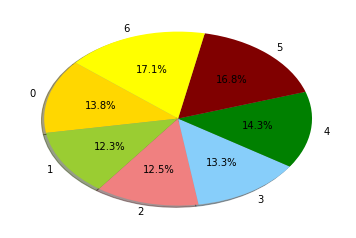

In [160]:
df = data.groupby('Weekday')['Weekday'].count()
value = np.array(df.values)
value = value/len(data)
day = sorted(list(data['Weekday'].unique()))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','maroon','yellow']
plt.pie(value, labels=day, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()  
# Distribution of Demand across various days of the week from historical data
plt.savefig("1.png")

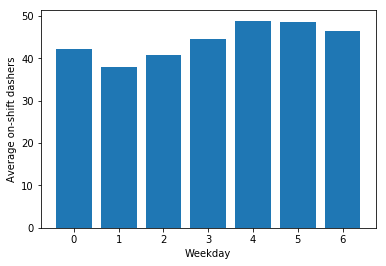

In [161]:
workload = data[['Weekday','total_onshift_dashers']].groupby('Weekday',as_index=False).mean()
x = workload['Weekday']
y = workload['total_onshift_dashers']
plt.bar(x,y)
plt.xlabel('Weekday')
plt.ylabel('Average on-shift dashers')
# Allocation of on-shift dashers is propotional to demand across days
plt.savefig("2.png")

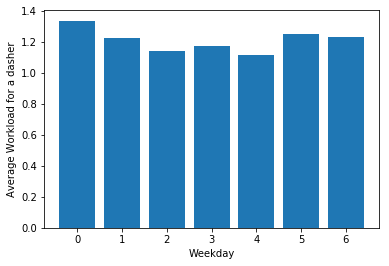

In [162]:
# Average workload
workload = data[['Weekday','workload']].groupby('Weekday',as_index=False).mean()
x = workload['Weekday']
y = workload['workload']
plt.bar(x,y)
plt.xlabel('Weekday')
plt.ylabel('Average Workload for a dasher') #Highest on Monday
plt.savefig("3.png")

In [163]:
data_heatmap = data[['Weekday','Time','workload']]

In [164]:
data_heat = data_heatmap.groupby(['Weekday','Time']).mean()

In [165]:
a = data_heat.workload.values
b = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
c = np.array([0,1,2])

In [166]:
data_heat = pd.DataFrame(a.reshape(7,3), index=b, columns=c)

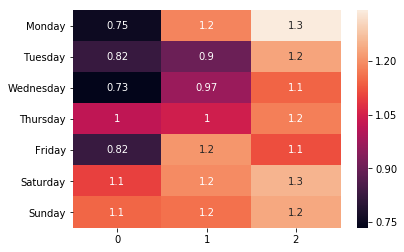

In [167]:
sns.heatmap(data_heat,annot=True)

In [168]:
data_heatmap2 = data[['Weekday','Time','total_onshift_dashers']]

In [169]:
data_heat2 = data_heatmap2.groupby(['Weekday','Time']).mean()

In [170]:
a2 = data_heat2.total_onshift_dashers.values
b2 = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
c2 = np.array([0,1,2])

In [171]:
data_heat2 = pd.DataFrame(a2.reshape(7,3), index=b2, columns=c2)

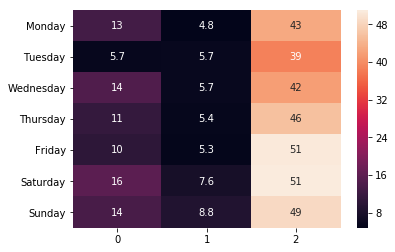

In [172]:
sns.heatmap(data_heat2,annot=True)

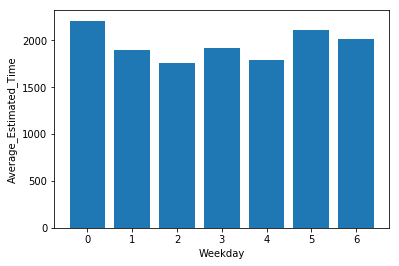

In [173]:
# Average estimated time
duration = data[['Weekday','estimated_time_for_cooking_&_pickup']].groupby('Weekday',as_index=False).mean()
x = duration['Weekday']
y = duration['estimated_time_for_cooking_&_pickup']
plt.bar(x,y)
plt.xlabel('Weekday')
plt.ylabel('Average_Estimated_Time') 
# This plot and the plot before give us an indication that estimated_time depends on workload of dasher
plt.savefig("4.png")

Text(0,0.5,'Average Item per order')

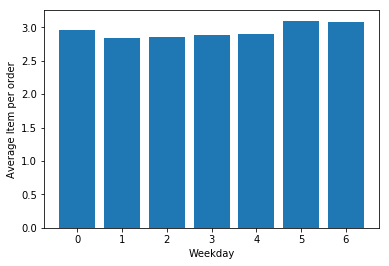

In [174]:
# Average items per order
duration = data[['Weekday','total_items']].groupby('Weekday',as_index=False).mean()
x = duration['Weekday']
y = duration['total_items']
plt.bar(x,y)
plt.xlabel('Weekday')
plt.ylabel('Average Item per order') # Not much variation

### Analysis wrt parts of the day

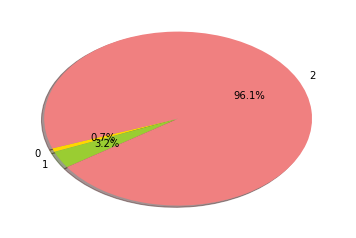

In [175]:
df = data.groupby('Time')['Weekday'].count()
value = np.array(df.values)
value = value/len(data)
day = sorted(list(data['Time'].unique()))
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(value, labels=day, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()
# Most of the orders take place after 6:00 pm in the night
plt.savefig("5.png")

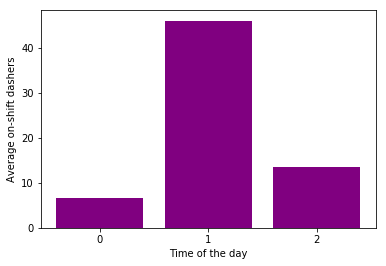

In [176]:
time = data[['Time','total_onshift_dashers']].groupby('Time',as_index=True).mean()
x = data['Time'].unique()
y = time['total_onshift_dashers']
plt.bar(x,y,color='purple')
plt.xlabel('Time of the day')
plt.ylabel('Average on-shift dashers')
# Although the demand is most in after 6:00 pm, the average on-shift dashers are less after 6:00 pm on average 
#thereby increasing the workload of dasher
plt.savefig("6.png")

Text(0,0.5,'Average outstanding order')

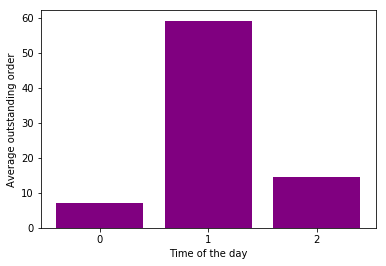

In [177]:
time = data[['Time','total_outstanding_orders']].groupby('Time',as_index=True).mean()
x = data['Time'].unique()
y = time['total_outstanding_orders']
plt.bar(x,y,color='purple')
plt.xlabel('Time of the day')
plt.ylabel('Average outstanding order') 

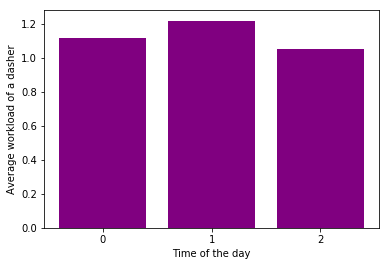

In [178]:
time = data[['Time','workload']].groupby('Time',as_index=True).mean()
x = data['Time'].unique()
y = time['workload']
plt.bar(x,y,color='purple')
plt.xlabel('Time of the day')
plt.ylabel('Average workload of a dasher')
plt.savefig("7.png")

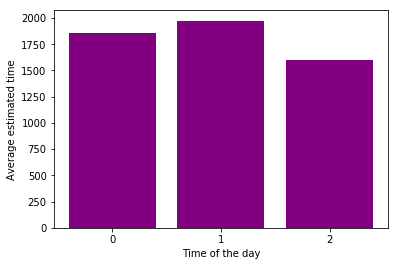

In [179]:
time = data[['Time','estimated_time_for_cooking_&_pickup']].groupby('Time',as_index=True).mean()
x = data['Time'].unique()
y = time['estimated_time_for_cooking_&_pickup']
plt.bar(x,y,color='purple')
plt.xlabel('Time of the day')
plt.ylabel('Average estimated time') # estimated time is related to the average workload of dasher
plt.savefig("8.png")

Text(0,0.5,'Average items per order')

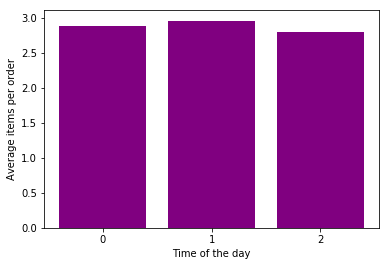

In [180]:
time = data[['Time','total_items']].groupby('Time',as_index=True).mean()
x = data['Time'].unique()
y = time['total_items']
plt.bar(x,y,color='purple')
plt.xlabel('Time of the day')
plt.ylabel('Average items per order') # Not much variation

### Analysis wrt to market region

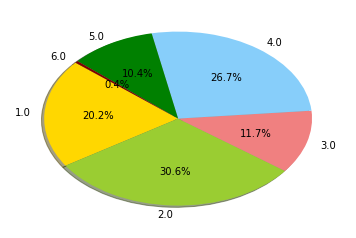

In [181]:
df = data.groupby('market_id')['Weekday'].count()
value = np.array(df.values)
value = value/len(data)
day = sorted(list(data['market_id'].unique()))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','maroon']
plt.pie(value, labels=day, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show() #Demand across region 2 and 4 are the highest
plt.savefig("9.png")

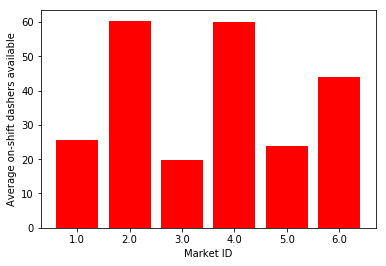

In [182]:
workload_2 = data[['market_id','total_onshift_dashers']].groupby('market_id',as_index=False).mean()
x = workload_2['market_id']
y = workload_2['total_onshift_dashers']
plt.bar(x,y,color='red')
plt.xlabel('Market ID')
plt.ylabel('Average on-shift dashers available') 
# 2nd RECOMMENDATION HERE
plt.savefig("10.png")

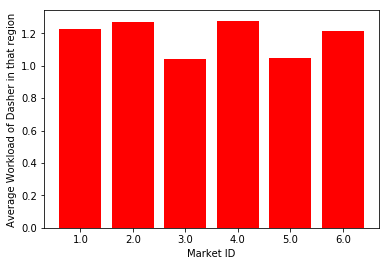

In [183]:
workload_2 = data[['market_id','workload']].groupby('market_id',as_index=False).mean()
x = workload_2['market_id']
y = workload_2['workload']
plt.bar(x,y,color='red')
plt.xlabel('Market ID')
plt.ylabel('Average Workload of Dasher in that region') 
# Even though the demand is less in region 6, the average workload and estimated time are high.
plt.savefig("11.png")

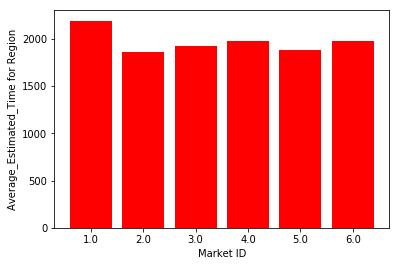

In [184]:
duration_2 = data[['market_id','estimated_time_for_cooking_&_pickup']].groupby('market_id',as_index=False).mean()
x = duration_2['market_id']
y = duration_2['estimated_time_for_cooking_&_pickup']
plt.bar(x,y,color='red')
plt.xlabel('Market ID')
plt.ylabel('Average_Estimated_Time for Region')
plt.savefig("12.png")

Text(0,0.5,'Average items per order')

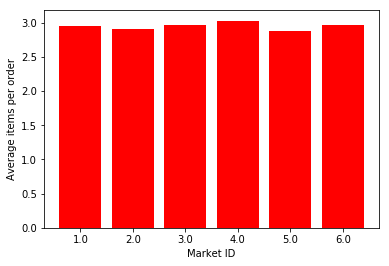

In [185]:
duration_3 = data[['market_id','total_items']].groupby('market_id',as_index=False).mean()
x = duration_3['market_id']
y = duration_3['total_items']
plt.bar(x,y,color='red')
plt.xlabel('Market ID')
plt.ylabel('Average items per order') # Not much variation

In [188]:
data_heat3 = data[['market_id','Weekday','workload']]
data_heat4 = data[['market_id','Time','workload']]

In [193]:
data_heat3 = data_heat3.groupby(['Weekday','market_id']).mean()
data_heat4 = data_heat4.groupby(['market_id','Time']).mean()

In [195]:
market_id = np.array([1.0,2.0,3.0,4.0,5.0,6.0])
b = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
c = np.array([0,1,2])

In [199]:
val1 = data_heat3.workload.values.reshape(7,6)
val2 = data_heat4.workload.values.reshape(3,6)

In [200]:
data_heat3 = pd.DataFrame(val1, index=b, columns=market_id)
data_heat4 = pd.DataFrame(val2,index=c,columns=market_id)

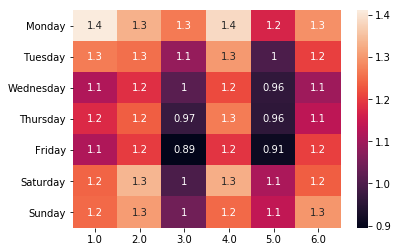

In [203]:
sns.heatmap(data_heat3,annot=True)

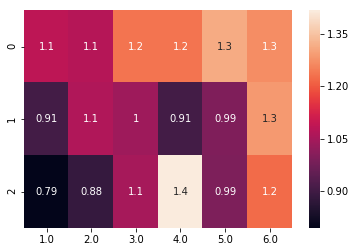

In [202]:
sns.heatmap(data_heat4,annot=True)

In [204]:
copy_3 = data.copy(deep=True)

### As we had already discussed, the estimated_time_for_cooking_&__pickup is made up of 2 parts:
### 1. Time for cooking
### 2. Time for pickup by dasher
### The distribution of these parts are not evident for each delivery. We had already seen that estimated_time_for_cooking_&__pickup is dependent on the workload of dasher( More the workload, more deliveries by single dasher, therefore the pickup_time for the next order gets delayed).
### Let's study the relationship of cuisine type with estimated_time
### Before the EDA, let's clean the cuisine column and fill-up the null values

In [205]:
cuisine = data.groupby(['store_id']).apply(lambda x: x['store_primary_category'].value_counts())

In [206]:
mask = cuisine.groupby(level="store_id").apply(lambda x: x == x[x.idxmax()])

In [207]:
final_cuisine = cuisine[mask]

In [208]:
cuisines = final_cuisine.index.tolist()

In [209]:
mapping = dict(cuisines)

In [210]:
data['store_primary_category'] = data.apply(lambda x: mapping[x['store_id']] if x['store_id'] in mapping else x['store_primary_category'],axis=1)

In [211]:
copy_4 = data.copy()

### To check the relationship between cuisine and estimated time, I am removing rows where the cuisine is not defined as the original dataset doesn't have store_id -> store_primary_category mapping for all store_id's

In [212]:
cuisines = data.dropna(subset=['store_primary_category'])
cuisines = cuisines.reset_index(drop=True)

### Analysis wrt to cuisine

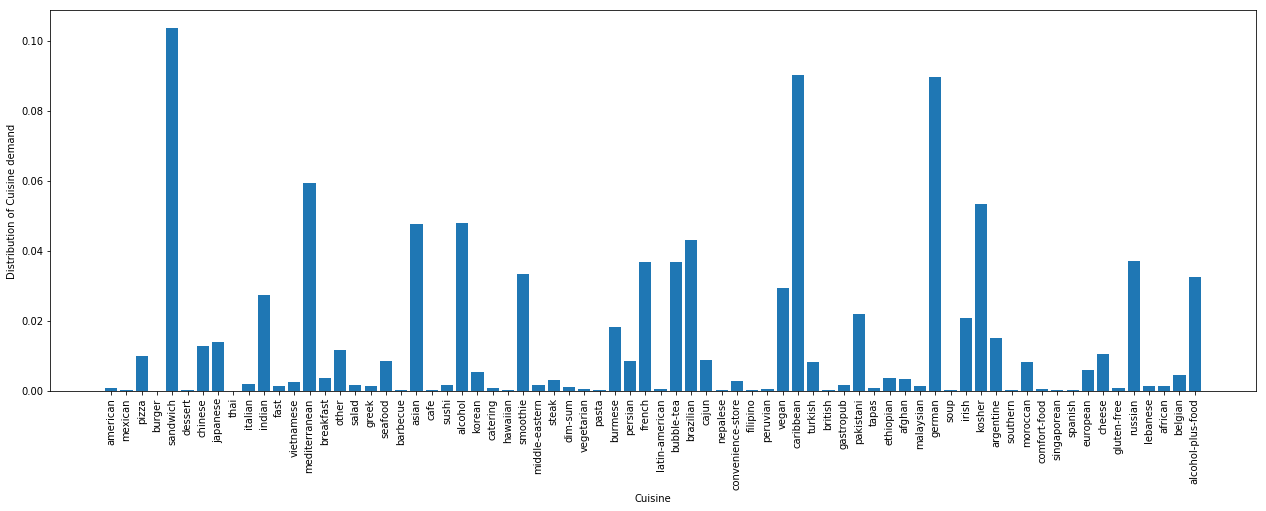

In [213]:
dist_cuisine = cuisines.groupby(['store_primary_category'])['Weekday'].count().sort_values(ascending=False)
dist = np.array(dist_cuisine.values)
dist = dist/len(cuisines)
types = np.array(dist_cuisine.index)
index = range(len(types))
plt.figure(figsize=(len(types)*0.3,7))
plt.bar(types,dist)
plt.xticks(index,types,rotation=90)
plt.xlabel("Cuisine")
plt.ylabel("Distribution of Cuisine demand")
plt.show() 

### Creating a mapping for cuisine with store_id

In [214]:
cuisine_ = list(cuisines['store_primary_category'].unique())
cuisine_mapping = {}
for i in range(len(cuisine_)):
    cuisine_mapping[cuisine_[i]] = str(i)

In [215]:
cuisines = cuisines.replace({'store_primary_category':cuisine_mapping})

In [216]:
cuisines['average_cost_per_item'] = cuisines['subtotal']/cuisines['total_items']

In [217]:
distribution = cuisines.groupby('store_id')['Weekday'].count().sort_values(ascending=False)

In [218]:
distribution.describe()

count    5404.000000
mean       30.618061
std        57.661883
min         1.000000
25%         4.000000
50%        11.000000
75%        32.000000
max       888.000000
Name: Weekday, dtype: float64

### Since there are a large population of restaurants, let's categorize the restaurants based on the frequency of orders from the dataset. The top 25% is high frequency(0), the next 50 percent is medium frequency(1) and the remaining is low frequency

In [219]:
high = np.array(distribution[distribution.values >= 32.0].index)
medium = np.array(distribution[(distribution.values < 32.0) & (distribution.values >= 11.0) ].index)
low = np.array(distribution[distribution.values < 11.0].index)

In [220]:
res_mapping = {}
for i in high:
    res_mapping[i] = 'a'
for j in medium:
    res_mapping[j] = 'b'
for k in low:
    res_mapping[k] = 'c'

In [221]:
cuisines = cuisines.replace({'store_id':res_mapping})

In [222]:
cuisines = cuisines.replace({'store_id':{'a':'0','b':'1','c':'2'}})

### I will drop the order_protocol column because there are many missing values and there are no unique mappings to store_id's for a single order_protocol and it doesn't convey any useful information. 

In [223]:
cuisines = cuisines.drop(columns=['order_protocol'])

### One of the most important parts of building a good machine learning model is feature selection. Feature selection involves selecting the best features that can minimize the root mean squared error of predicted values. Some of the features were evident from the visualization such as workload, cuisine, weekday and so on. But we need to follow some feature selection strategies to get the right model.

### For the purpose of estimated time prediction, we will be using the following models to do feature selection
### 1. Linear Regression
### 2. Lasso Regression
### 3. Ridge Regression
### 4. Stability Selection with Randomized Lasso
### 5. RandomizedForestRegressor

In [224]:
X = cuisines.drop(columns=['estimated_time_for_cooking_&_pickup']).reset_index(drop=True)
Y = cuisines[['estimated_time_for_cooking_&_pickup']]


In [225]:
X.head()

,market_id,Weekday,Time,store_id,store_primary_category,num_distinct_items,total_items,subtotal,max_item_price,min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,workload,average_cost_per_item
0,1.0,4,2,2,0,4,4,3441,1239,557,33.0,14.0,21.0,0.636364,860.25
1,2.0,1,2,1,1,1,1,1900,1400,1400,1.0,1.0,2.0,2.000000,1900.00
2,3.0,3,2,1,1,1,1,1900,1900,1900,1.0,0.0,0.0,0.000000,1900.00
3,3.0,1,2,1,1,5,6,6900,1800,600,1.0,1.0,2.0,2.000000,1150.00
4,3.0,6,2,1,1,3,3,3900,1600,1100,6.0,6.0,9.0,1.500000,1300.00


In [226]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165460 entries, 0 to 165459
Data columns (total 15 columns):
market_id                   165460 non-null object
Weekday                     165460 non-null object
Time                        165460 non-null object
store_id                    165460 non-null object
store_primary_category      165460 non-null object
num_distinct_items          165460 non-null int64
total_items                 165460 non-null int64
subtotal                    165460 non-null int64
max_item_price              165460 non-null int64
min_item_price              165460 non-null int64
total_onshift_dashers       165460 non-null float64
total_busy_dashers          165460 non-null float64
total_outstanding_orders    165460 non-null float64
workload                    165460 non-null float64
average_cost_per_item       165460 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 18.9+ MB


### Since we have a mix of categorical and numerical variables, let's check their relationship with the final outcome that we will be predicting. For categorical_variables, let's use ANOVA to see if there is a relationship between categories and final outcome. For numerical, let's check the correlation

In [227]:
numerical = X.select_dtypes(include=['int64','float64'])
categorical = X.select_dtypes(include=['object'])

In [228]:
categorical['estimated_time'] = Y
numerical['estimated_time'] = Y

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### For categorical variables, 
### let the null hypothesis be "there is no relation between variables and estimated time". The mean estimated times are same
### The alternate hypothesis is "there is a relation between variables and estimated time". The mean estimated times are different
### Assuming 95 percent confidence level

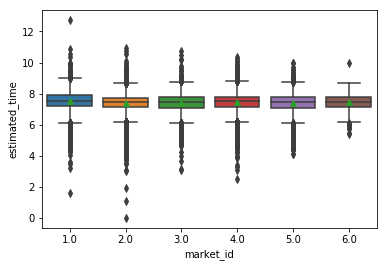

In [229]:
# market_id
sns.boxplot(x=categorical['market_id'],y=np.log(categorical['estimated_time']),showmeans=True)

In [230]:
model = smf.ols(formula='estimated_time~market_id',data=categorical)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         estimated_time   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 07 Jan 2019   Prob (F-statistic):          2.35e-270
Time:                        21:23:35   Log-Likelihood:            -1.4297e+06
No. Observations:              165460   AIC:                         2.859e+06
Df Residuals:                  165454   BIC:                         2.859e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2189.5168      7.483  

### Since the means overlap for various market_id's it follows the null hypothesis, so we remove market_id from the data

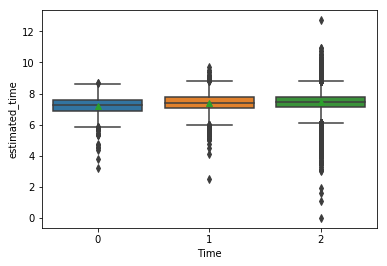

In [149]:
sns.boxplot(x=categorical['Time'],y=np.log(categorical['estimated_time']),showmeans=True)

In [231]:
model = smf.ols(formula='estimated_time~Time',data=categorical)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         estimated_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     59.15
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           2.09e-26
Time:                        21:27:05   Log-Likelihood:            -1.4302e+06
No. Observations:              165460   AIC:                         2.860e+06
Df Residuals:                  165457   BIC:                         2.861e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1601.9174     40.290     39.760      0.0

### Since p value is less than 0.05 and the F statistic is higher than F(2,inf), we can reject the null hypothesis for Time

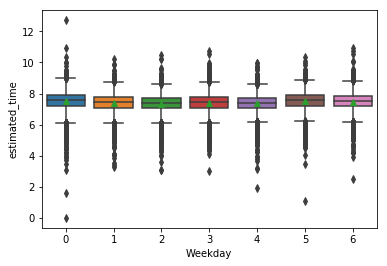

In [232]:
sns.boxplot(x=categorical['Weekday'],y=np.log(categorical['estimated_time']),showmeans=True)

In [233]:
model = smf.ols(formula='estimated_time~Weekday',data=categorical)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         estimated_time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     329.0
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:27:11   Log-Likelihood:            -1.4293e+06
No. Observations:              165460   AIC:                         2.859e+06
Df Residuals:                  165453   BIC:                         2.859e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2208.6015      9.055    243.902   

### p value is less than 0.05 and F value is higher , reject null hypothesis

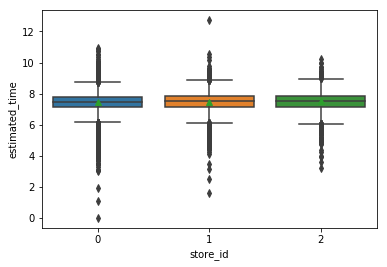

In [234]:
sns.boxplot(x=categorical['store_id'],y=np.log(categorical['estimated_time']),showmeans=True)

In [235]:
model = smf.ols(formula='estimated_time~store_id',data=categorical)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         estimated_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           4.53e-46
Time:                        21:27:31   Log-Likelihood:            -1.4302e+06
No. Observations:              165460   AIC:                         2.860e+06
Df Residuals:                  165457   BIC:                         2.860e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1940.8459      3.857    503.147

### Means are same, therefore we reject the alternate hypothesis, therefore we can eliminate store_id

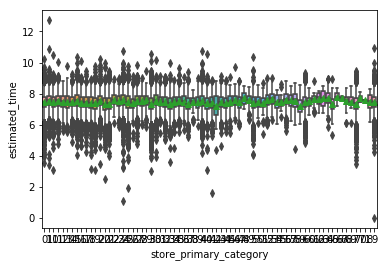

In [236]:
sns.boxplot(x=categorical['store_primary_category'],y=np.log(categorical['estimated_time']),showmeans=True)

In [237]:
model = smf.ols(formula='estimated_time~store_primary_category',data=categorical)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         estimated_time   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     24.38
Date:                Mon, 07 Jan 2019   Prob (F-statistic):          1.20e-312
Time:                        21:28:00   Log-Likelihood:            -1.4294e+06
No. Observations:              165460   AIC:                         2.859e+06
Df Residuals:                  165388   BIC:                         2.860e+06
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Although some p values are less than the confidence level we had set initially, the F statistic is less than the critical value (62), therefore we reject the alternate hypothesis and eliminate store_primary_category

In [238]:
numerical.corr()['estimated_time'].sort_values(ascending=False)

estimated_time              1.000000
workload                    0.268776
total_outstanding_orders    0.155771
subtotal                    0.138987
num_distinct_items          0.099245
max_item_price              0.095970
total_busy_dashers          0.092969
total_items                 0.090038
total_onshift_dashers       0.063889
average_cost_per_item       0.052435
min_item_price              0.002415
Name: estimated_time, dtype: float64

### For numerical data, we see that there exists some correlation between variables. Let's rank numerical and categorical together and choose the right features for final model. Let's remove numerical values where the correlation is less than 0.1.

In [239]:
X = X[['workload','subtotal','Time','Weekday']]

In [240]:
Y = cuisines[['estimated_time_for_cooking_&_pickup']]

In [241]:
X = pd.get_dummies(X)

In [242]:
X.head()

,workload,subtotal,Time_0,Time_1,Time_2,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,0.636364,3441,0,0,1,0,0,0,0,1,0,0
1,2.000000,1900,0,0,1,0,1,0,0,0,0,0
2,0.000000,1900,0,0,1,0,0,0,1,0,0,0
3,2.000000,6900,0,0,1,0,1,0,0,0,0,0
4,1.500000,3900,0,0,1,0,0,0,0,0,0,1


In [243]:
column_names = X.columns

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [245]:
ranks = {}

In [246]:
def feature_ranking(rank,col_names,order=1):
    minmax = MinMaxScaler()
    rank = minmax.fit_transform(order*np.array([rank]).T).T[0]
    rank = map(lambda x:round(x,4),rank)
    return dict(zip(col_names,rank))

### Stability Selection with Randomized Lasso

In [254]:
lasso = RandomizedLasso(alpha=0.1)
lasso.fit(X_train,Y_train)

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedLasso(alpha=0.1, eps=2.220446049250313e-16, fit_intercept=True,
        max_iter=500, memory=None, n_jobs=1, n_resampling=200,
        normalize=True, pre_dispatch='3*n_jobs', precompute='auto',
        random_state=None, sample_fraction=0.75, scaling=0.5,
        selection_threshold=0.25, verbose=False)

In [255]:
lasso.scores_

array([1.   , 1.   , 0.   , 0.   , 0.   , 0.755, 0.015, 0.46 , 0.   ,
       0.535, 0.475, 0.   ])

In [256]:
ranks['lasso_stability'] = feature_ranking(np.abs(lasso.scores_),column_names)

In [257]:
ranks

{'lasso_stability': {'Time_0': 0.0,
  'Time_1': 0.0,
  'Time_2': 0.0,
  'Weekday_0': 0.755,
  'Weekday_1': 0.015,
  'Weekday_2': 0.46,
  'Weekday_3': 0.0,
  'Weekday_4': 0.535,
  'Weekday_5': 0.475,
  'Weekday_6': 0.0,
  'subtotal': 1.0,
  'workload': 1.0},
 'linear_regression': {'Time_0': 0.5061,
  'Time_1': 0.5061,
  'Time_2': 0.5061,
  'Weekday_0': 1.0,
  'Weekday_1': 1.0,
  'Weekday_2': 1.0,
  'Weekday_3': 1.0,
  'Weekday_4': 1.0,
  'Weekday_5': 1.0,
  'Weekday_6': 1.0,
  'subtotal': 0.0,
  'workload': 0.0}}

### Linear Model Feature Ranking

In [258]:
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [259]:
ranks['linear_regression'] = feature_ranking(np.abs(linear_regression.coef_.flatten()),column_names)

In [277]:
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [278]:
ranks['lasso_regression'] = feature_ranking(np.abs(lasso_regression.coef_),column_names)

In [279]:
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [280]:
ranks['ridge_regression'] = feature_ranking(np.abs(ridge_regression.coef_.flatten()),column_names)

### Recursive Feature Elimination

In [282]:
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [283]:
rfe = RFE(linear_reg,n_features_to_select=1,verbose=3)
rfe.fit(X_train,Y_train)

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
  n_features_to_select=1, step=1, verbose=3)

In [284]:
ranks["RFE"] = feature_ranking(list(map(float,rfe.ranking_)),column_names,order=-1)

In [285]:
random_forest = RandomForestRegressor(n_jobs=-1,n_estimators=50)

In [286]:
random_forest.fit(X_train,Y_train)

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [287]:
random_forest.feature_importances_

array([0.40518097, 0.48746678, 0.00091314, 0.00250479, 0.00347393,
       0.03666158, 0.01041111, 0.00938128, 0.01207607, 0.0102968 ,
       0.01040814, 0.01122541])

In [288]:
ranks["Random_Forest"] = feature_ranking(random_forest.feature_importances_,column_names)

### Converting ranking into a dataframe and taking average importance

In [289]:
mean_rank = {}
for name in column_names:
    mean_rank[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

In [290]:
rankings = pd.DataFrame(columns=["Features","Ranking"])

In [291]:
rankings['Features'] = mean_rank.keys()
rankings['Ranking'] = mean_rank.values()

In [292]:
rankings = rankings.sort_values(by="Ranking",ascending=False)

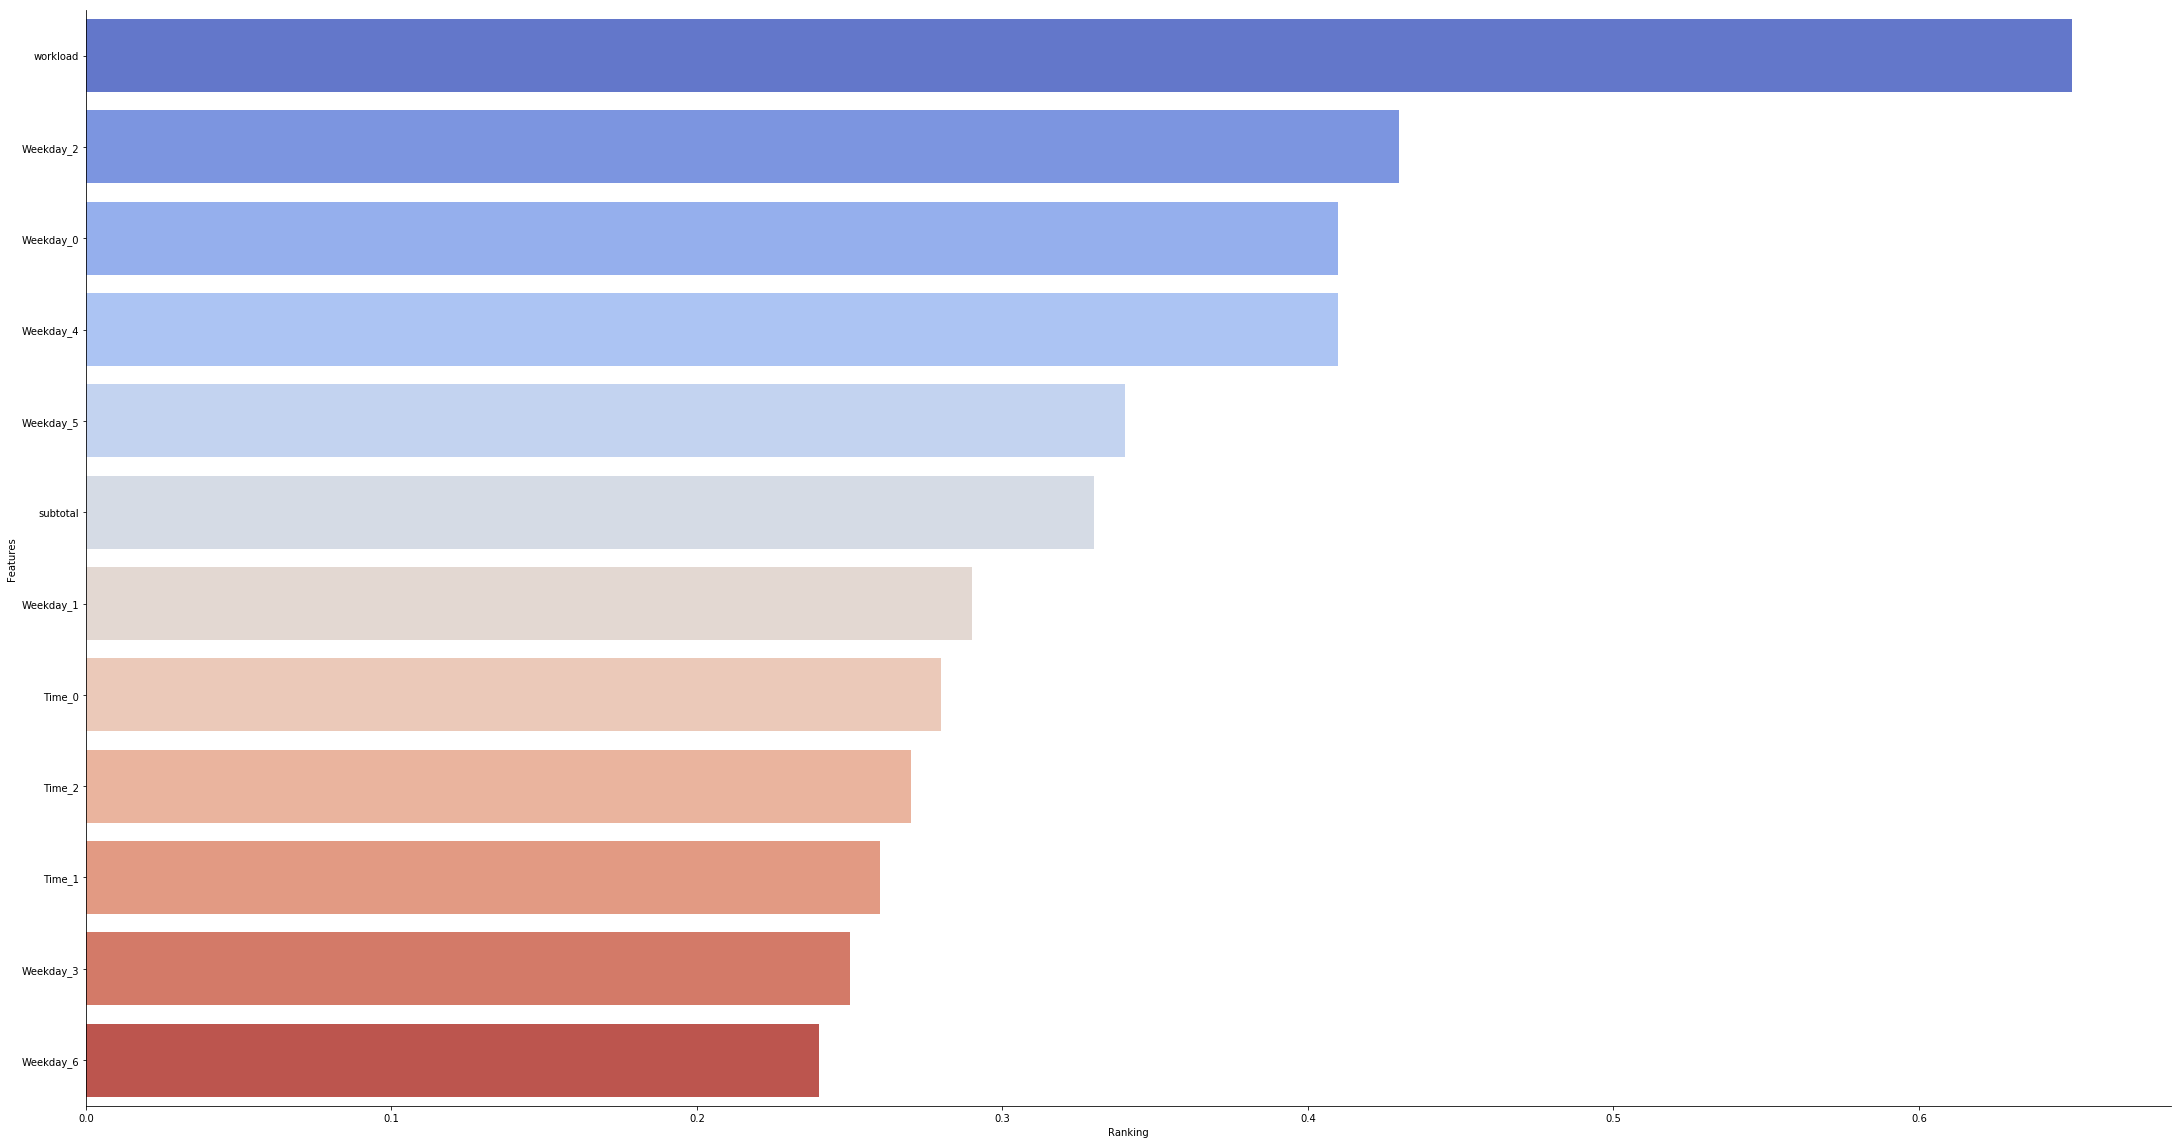

In [293]:
sns.factorplot(x="Ranking",y="Features",data=rankings,kind="bar",size=16,aspect=1.9,palette="coolwarm")

### The features here make sense. The estimated_time depends on time for cooking and time for pickup. The pickup time depends on the workload of the dasher, day of the week and time of the day. The cooking time also depends on the no of items ordered(subtotal), day of the week and time of the day. So the feature extraction makes sense.

### Since the dummy variables are not ranked together, it is not right to eliminate some of them and keep the rest as these dummy variables together represent a category.

### Machine Learning Modelling - Let's apply these features to a model and see which combination of features gives us the least root_mean_squared_error on the test data. We can compare model's performance based on that

In [294]:
X = pd.get_dummies(X)

In [295]:
pipeline = [('LR',LinearRegression()),('GBR',GradientBoostingRegressor()),('EN', ElasticNet()),('KNN', KNeighborsRegressor()),('DTR', DecisionTreeRegressor()),('LASSO', Lasso())]

In [296]:
# standardize numerical data
X_sample = X[['workload','subtotal']]
scaler = StandardScaler().fit(X_sample)
X_sample = scaler.transform(X_sample)

In [297]:
X[['workload','subtotal']] = X_sample

In [298]:
X.head()

,workload,subtotal,Time_0,Time_1,Time_2,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,-1.230707,0.650720,0,0,1,0,0,0,0,1,0,0
1,1.677408,-0.406820,0,0,1,0,1,0,0,0,0,0
2,-2.587827,-0.406820,0,0,1,0,0,0,1,0,0,0
3,1.677408,3.024523,0,0,1,0,1,0,0,0,0,0
4,0.611099,0.965717,0,0,1,0,0,0,0,0,0,1


In [299]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [300]:
results = []
names = []
for name,model in pipeline:
    kfold = KFold(n_splits=10,random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(cv_results)

LR: -1885678.707610 (2443125.801619)
[ -962117.45186509  -956657.7446649  -1146882.6945412  -1196028.06116659
 -9208980.0557207   -967134.03066081  -946928.46368332 -1208441.16824806
 -1140302.44297943 -1123314.96256761]


/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when 

GBR: -1843397.327604 (2441798.527952)
[ -877520.2509668   -966988.34320995 -1022783.95122732 -1157818.15701158
 -9163226.29504598  -926468.43316355  -945491.26761795 -1162705.80209375
 -1098234.6580865  -1112736.11761424]
EN: -1905597.560430 (2448869.754416)
[ -938917.04643536  -982828.05701826 -1127350.47980453 -1222503.13550512
 -9245575.11642811  -999364.92167897  -974467.49915858 -1241780.83854495
 -1168793.9000779  -1154394.60964973]
KNN: -2150413.853893 (2410732.655177)
[-1391911.00317229 -1423925.37624087 -1210297.90234718 -1344912.40394111
 -9361655.92104652 -1118695.43119569 -1074531.33775163 -1666437.33564355
 -1625601.91734091 -1286169.91024851]
DTR: -3713966.499773 (3251048.608421)
[ -2214292.66284716  -2014387.71054006  -1974343.49184027
  -2208606.96994511 -10130461.73295618  -1859087.15871472
  -2088181.00763911  -2334646.05792368 -10290658.92632807
  -2024999.27900056]
LASSO: -1885856.616697 (2443226.649121)
[ -961969.64779823  -956938.10788936 -1146884.30094625 -119599

### Gradient Boosting Regressor outperformed the other models on the scaled version of numerical data. So Let's focus on developing a GBR. It will be tested using with a few n_estimators using GridSearchCV function

In [301]:
parameters = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10,random_state=21)
grid = GridSearchCV(estimator=model,param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train,y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best estimator: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when 

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when 

-1841683.219155 (2444109.578864) with: {'n_estimators': 50}
-1843406.726536 (2441815.878365) with: {'n_estimators': 100}
-1906662.608643 (2420684.524662) with: {'n_estimators': 200}
-1919163.869281 (2415894.295619) with: {'n_estimators': 300}
-1917108.504803 (2416351.993063) with: {'n_estimators': 400}
Best estimator: -1841683.219155 using {'n_estimators': 50}


### Prediction and Evaluation of Model

In [303]:
X_test_sample = X_test[['workload','subtotal']]
scaler = StandardScaler().fit(X_test_sample)
X_test_sample = scaler.transform(X_test_sample)
X_test[['workload','subtotal']] = X_test_sample
X_test.head()

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,workload,subtotal,Time_0,Time_1,Time_2,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
66978,-0.101090,-0.666978,0,0,1,0,0,0,1,0,0,0
71310,0.423384,-0.789188,0,0,1,0,0,0,0,0,0,1
25335,-0.565624,-0.529663,0,0,1,0,0,0,0,0,0,1
54414,-1.540437,0.343658,0,0,1,0,0,0,0,1,0,0
12668,-0.058276,2.046359,0,0,1,0,0,0,1,0,0,0


In [304]:
model = GradientBoostingRegressor(random_state=21,n_estimators=50)
model.fit(X_train,y_train)

/Users/srivatsanramesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=21,
             subsample=1.0, verbose=0, warm_start=False)

In [305]:
predictions = model.predict(X_test)

In [307]:
np.mean((predictions - y_test)**2)

ValueError: Shape of passed values is (33092, 33092), indices imply (1, 33092)